# Figure 4c

In [1]:
import scanpy as sc
import pandas as pd
import numpy as np

import mplscience
import matplotlib.pyplot as plt

from mousipy import translate

import os
import warnings
warnings.filterwarnings('ignore')

data_path = '../public/'
marker_path = '../markers/'
plot_path = '../plot/'
output_path = '../output/'

cmap = 'viridis'

# Load data

#### Astrocytoma

In [2]:
astrocytoma = sc.read_h5ad(os.path.join(data_path, 'human_astrocytoma.h5ad'))
astrocytoma

AnnData object with n_obs × n_vars = 72385 × 3000
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'orig.ident', 'seurat_clusters', 'grade', 'New_NMF_labelling'
    var: 'sct.detection_rate', 'sct.gmean', 'sct.variance', 'sct.residual_mean', 'sct.residual_variance', 'sct.variable'
    uns: 'neighbors'
    obsm: 'X_harmony', 'X_pca', 'X_tsne', 'X_umap'
    varm: 'HARMONY', 'PCs'
    layers: 'scaled'
    obsp: 'distances'

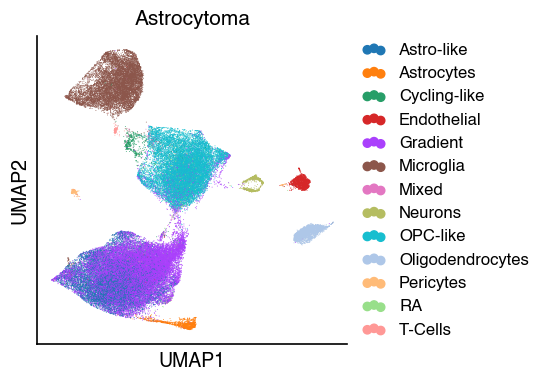

In [3]:
with mplscience.style_context():
    sc.pl.umap(astrocytoma, color=['New_NMF_labelling'], title="Astrocytoma")

In [3]:
astrocytoma = astrocytoma.raw.to_adata()
adata = translate(astrocytoma)

100%|██████████| 27691/27691 [00:40<00:00, 686.69it/s]


Found direct orthologs for 15266 genes.
Found multiple orthologs for 442 genes.
Found no orthologs for 3758 genes.
Found no index in biomart for 8225 genes.


100%|██████████| 442/442 [00:23<00:00, 18.97it/s]


In [4]:
adata = adata[:,~adata.var['original_gene_symbol'].isna()]

In [5]:
adata.layers['counts'] = adata.X.copy()
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

In [6]:
topgenes = pd.read_csv(os.path.join(marker_path, 'nmf_topgenes.csv'), index_col=0)
topgenes_dict = {}

for c in topgenes.columns:
    common_genes = adata.var_names.intersection(topgenes[c]).tolist()
    topgenes_dict[c] = common_genes

In [7]:
i = 50

for k in topgenes_dict.keys():
    sc.tl.score_genes(adata, gene_list = topgenes_dict[k][:i], score_name = f'{k}')
    
names = [t for t in adata.obs_keys() if t.startswith('NMF_Module')]

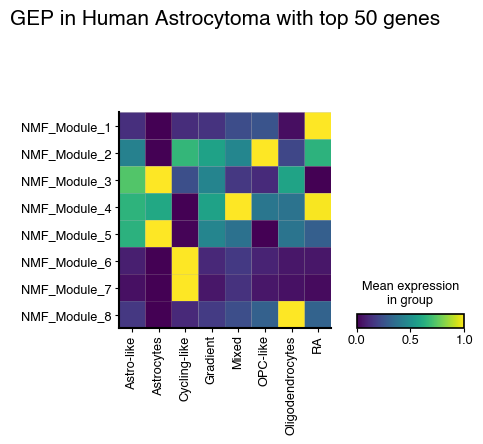

In [9]:
subset = adata[adata.obs['New_NMF_labelling'].isin(['Astro-like', 'Astrocytes', 'Cycling-like', 'Gradient', 'Mixed', 'OPC-like', 'Oligodendrocytes', 'RA'])].copy()

cell_type_order = [ 'RA', 'OPC-like', 'Mixed', 'Gradient', 'Astro-like', 'Astrocytes',  'Cycling-like',  'Oligodendrocytes',]

subset.obs['New_NMF_labelling'] = pd.Categorical(subset.obs['New_NMF_labelling'], categories=cell_type_order, ordered=True)


with mplscience.style_context():
    sc.pl.matrixplot(subset, names, groupby='New_NMF_labelling', standard_scale='var', swap_axes=True, title = f"GEP in Human Astrocytoma with top {i} genes", cmap=cmap, show=False)
    plt.savefig(os.path.join(plot_path, 'Fig4E_MatrixPlot_HumanAstrocytoma.pdf'), dpi = 300, format = 'pdf', bbox_inches='tight')
    plt.show()

#### Oligodendroma

In [9]:
oligodendroma = sc.read_h5ad(os.path.join(data_path, 'human_oligodendroma.h5ad'))
oligodendroma

AnnData object with n_obs × n_vars = 76680 × 3000
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'orig.ident', 'seurat_clusters', 'grade', 'New_NMF_labelling'
    var: 'sct.detection_rate', 'sct.gmean', 'sct.variance', 'sct.residual_mean', 'sct.residual_variance', 'sct.variable'
    uns: 'neighbors'
    obsm: 'X_harmony', 'X_pca', 'X_umap'
    varm: 'HARMONY', 'PCs'
    layers: 'scaled'
    obsp: 'distances'

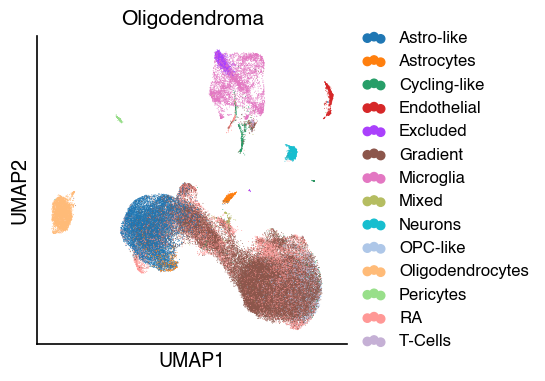

In [10]:
with mplscience.style_context():
    sc.pl.umap(oligodendroma, color=['New_NMF_labelling'], title="Oligodendroma")

In [11]:
oligodendroma = oligodendroma.raw.to_adata()
adata = translate(oligodendroma)

100%|██████████| 27584/27584 [00:40<00:00, 677.10it/s]


Found direct orthologs for 15199 genes.
Found multiple orthologs for 432 genes.
Found no orthologs for 3743 genes.
Found no index in biomart for 8210 genes.


100%|██████████| 432/432 [00:22<00:00, 19.54it/s]


In [12]:
adata = adata[:,~adata.var['original_gene_symbol'].isna()]

In [13]:
adata.layers['counts'] = adata.X.copy()
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

In [14]:
topgenes = pd.read_csv(os.path.join(marker_path, 'nmf_topgenes.csv'), index_col=0)
topgenes_dict = {}

for c in topgenes.columns:
    common_genes = adata.var_names.intersection(topgenes[c]).tolist()
    topgenes_dict[c] = common_genes

In [15]:
i = 50

for k in topgenes_dict.keys():
    sc.tl.score_genes(adata, gene_list = topgenes_dict[k][:i], score_name = f'{k}')
    
names = [t for t in adata.obs_keys() if t.startswith('NMF_Module')]

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


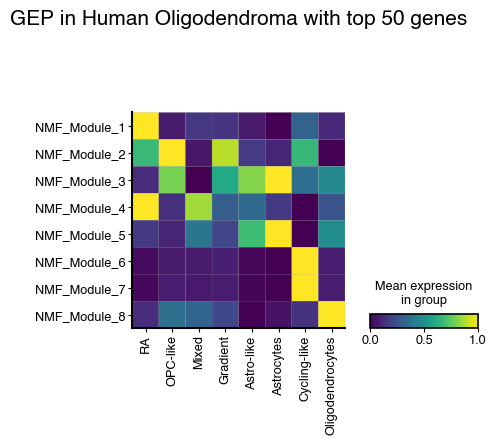

In [16]:
subset = adata[adata.obs['New_NMF_labelling'].isin(['Gradient', 'Astro-like', 'OPC-like','Astrocytes','Oligodendrocytes','RA', 'Mixed','Cycling-like',])].copy()

cell_type_order = [ 'RA', 'OPC-like', 'Mixed', 'Gradient', 'Astro-like', 'Astrocytes',  'Cycling-like',  'Oligodendrocytes',]

subset.obs['New_NMF_labelling'] = pd.Categorical(subset.obs['New_NMF_labelling'], categories=cell_type_order, ordered=True)

with mplscience.style_context():
    sc.pl.matrixplot(subset, names, groupby='New_NMF_labelling', standard_scale='var', swap_axes=True, title = f"GEP in Human Oligodendroma with top {i} genes", cmap=cmap, show=False)
    plt.savefig(os.path.join(plot_path, 'Fig4E_MatrixPlot_HumanOligodendroma.pdf'), dpi = 300, format = 'pdf', bbox_inches='tight')
    plt.show()